## Employee Left Prediction

The Human Resources (HR) department is in charge of taking care of employee’s well being and ensuring they are happy with their position. With machine learning, you can actually predict employee attrition to see what causes a valuable employee to leave or stay with a company. This is perfect for HR managers planning their hiring and auditing employee experience.


As a business, you can predict questions like:

What causes employee churn?                                       
Why do we lose valuable employees?                                         
When will an employee most likely leave the company?


In [1]:
# importing required lib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_validate
from sklearn import metrics 
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing datasets 
df_emp = pd.read_csv("Employee_Data.csv")
df_emp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#printing shape and data types of dataset
print(df_emp.shape)
print(df_emp.dtypes)

(14999, 10)
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


In [4]:
#cheking null values
df_emp.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
#checking duplicates rows
df_emp.duplicated().sum()

3008

In [6]:
# droping duplicated values
df_emp.drop_duplicates(inplace = True)

In [7]:
#printing shape 
print("shape : ", df_emp.shape)
print("duplicates : ", df_emp.duplicated().sum())

shape :  (11991, 10)
duplicates :  0


In [8]:
#reseting index after dropping 
df_emp.reset_index(inplace = True, drop = True)

In [9]:
left_dict = df_emp.left.value_counts().to_dict()
left_dict

{0: 10000, 1: 1991}

Text(0.5, 1.0, 'employee notleft - left count ')

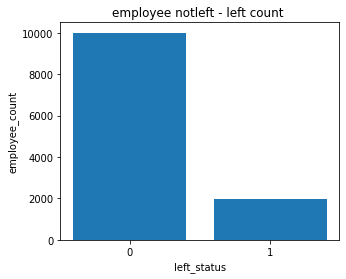

In [10]:
#checkign penetration in left columns
fig = plt.figure(figsize = (5,4))

plt.bar(["0","1"],left_dict.values())
plt.xlabel("left_status")
plt.ylabel("employee_count")
plt.title("employee notleft - left count ")

#this is the imbalanced class problem - firstly we will go with the datasets and lastly will dicide if balancing required based on model evaluattion 


### Checking corretion beetween features

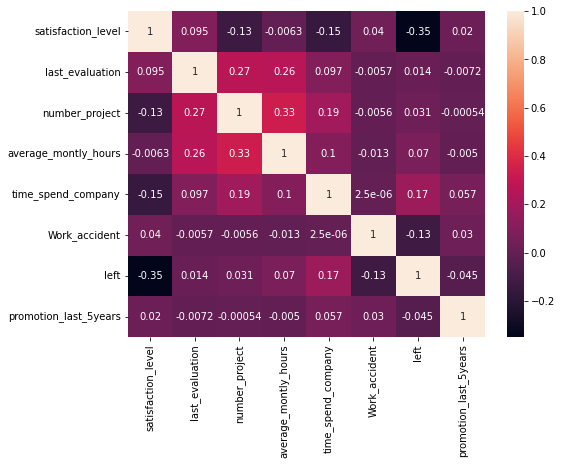

In [11]:
# checking corretion beetween features
fig = plt.figure(figsize = (8,6))
sns.heatmap(df_emp.corr(),annot = True)
plt.show()

# from correlation plot - we got that there is no strong correlation b/w any feature 

### Univarient analysis


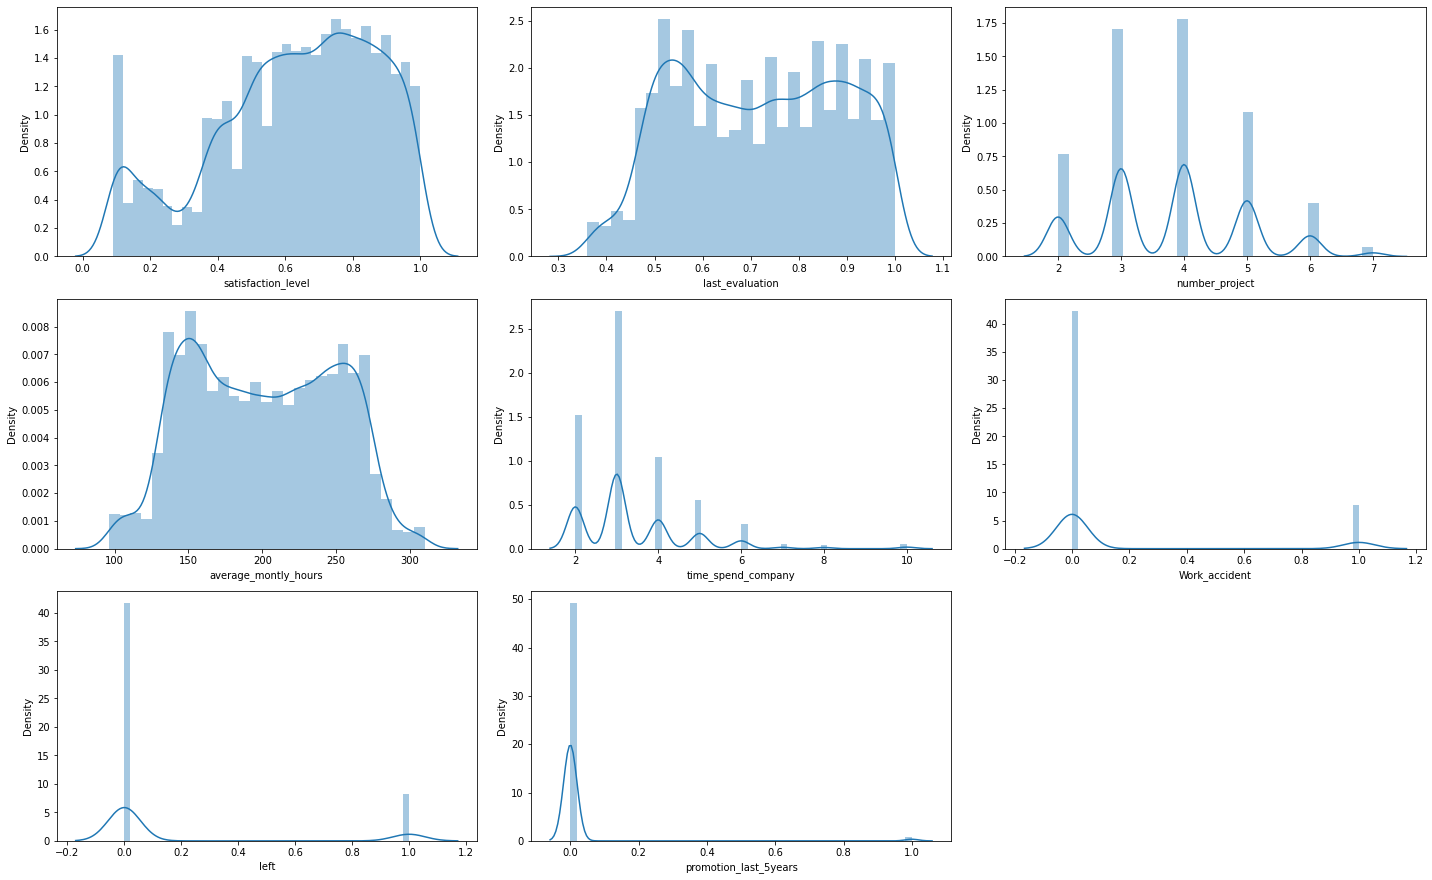

In [12]:
# checking distribustion of each numerical columns 
plt.figure(figsize=(20, 20))

numeric_cols = df_emp.columns[:-2]
for i in range(0, len(numeric_cols)):
     plt.subplot(5, 3, i+1)
     sns.distplot(x=df_emp[numeric_cols[i]],kde=True)
     plt.xlabel(numeric_cols[i])
     plt.tight_layout()

#### Observations
Maxismum employee falls in 0.5 to 1 satishfication level                                                         
last evaluation and average monthly hours data showing somewhate equal distribution                        
Number of project data showing normal distribution curbe                                             
time spend in company data showing most of user left the company after 4 to 5 years                        
promotion data showing very few employees were promoted 


<AxesSubplot:xlabel='salary', ylabel='count'>

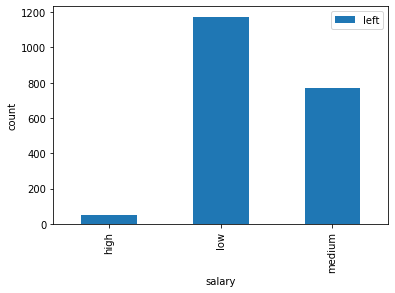

In [13]:
# employee left vs salary 
df_temp = df_emp[["salary","left"]].groupby(by ="salary").agg('sum')
df_temp.plot(kind='bar',stacked = False, ylabel ="count")

In the employee left vs salary showing maximum employee left the company who have low salary

### bivarient analysis

<AxesSubplot:xlabel='salary'>

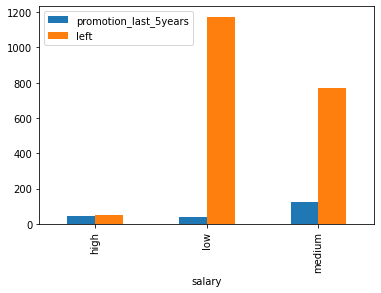

In [14]:
# promotion_last_5years vs salary 
df_temp = df_emp[["promotion_last_5years","salary","left"]].groupby(by ="salary").agg({"promotion_last_5years":"sum","left":'sum'})
df_temp.plot(kind='bar',stacked = False)

Text(0, 0.5, '% of employee left')

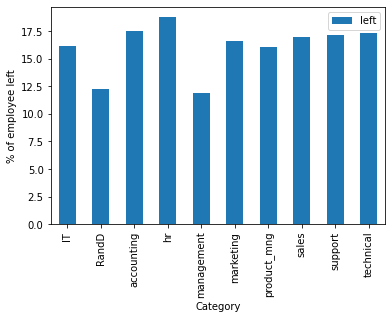

In [15]:
## percentage of left wrt to department  
df_temp = df_emp[["sales","left"]].groupby(by ="sales").mean()*100

df_temp.plot(kind='bar',stacked = False)
plt.xlabel("Category")
plt.ylabel("% of employee left")

#percentage of left vs to department  - except Management and R&D department having low left percentage

<function matplotlib.pyplot.show(close=None, block=None)>

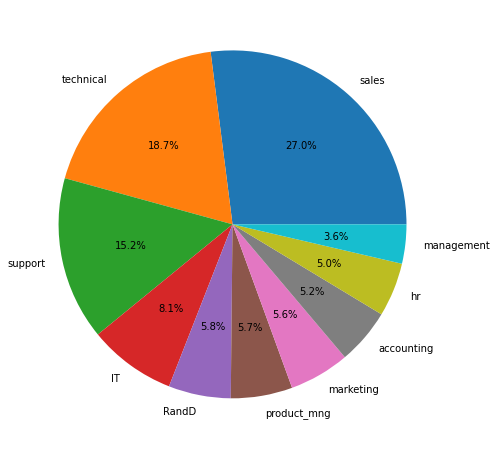

In [16]:
# checking penetration of each categorical values in sale
sale_dict = df_emp.sales.value_counts().to_dict()
fig = plt.figure(figsize = (8,8))
plt.pie(sale_dict.values(),labels =  sale_dict.keys(),autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

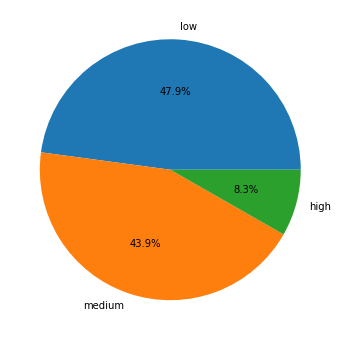

In [17]:
# checking penetration of each categorical values in salary
salary_dict = df_emp.salary.value_counts().to_dict()
fig = plt.figure(figsize = (6,6))
plt.pie(salary_dict.values(),labels =  salary_dict.keys(),autopct='%1.1f%%')
plt.show

### Encoding the categorical columns

In [18]:
# OneHotEndcoding sales column
df_final = df_emp.copy()
df_sales = pd.get_dummies(df_final["sales"])
df_final = pd.concat([df_final,df_sales],axis = 1)
df_final.drop("sales",inplace = True, axis = 1)
df_final.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
6598,0.68,0.89,4,227,3,0,0,0,medium,0,0,0,0,0,0,0,0,1
8972,0.79,0.50,3,213,3,1,0,0,low,0,0,0,0,0,0,0,1,0
10085,0.85,0.69,3,263,3,0,0,0,medium,0,0,0,0,0,0,0,0,0
8148,0.42,0.60,2,188,3,0,0,0,medium,0,0,0,0,0,0,1,0,0
1659,0.41,0.51,2,159,3,0,1,0,medium,1,0,0,0,0,0,0,0,0


In [19]:
# label encoding to Salary_column
salary_dict = {"low" : 0, "medium" : 1 , "high": 2}
df_final["salary"] = df_final["salary"].apply(lambda sal :salary_dict.get(sal) )
df_final.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
9770,0.62,0.67,3,212,3,0,0,0,1,0,0,0,0,0,1,0,0,0
8610,0.58,0.74,4,180,3,0,0,0,2,0,0,0,0,0,0,1,0,0
9087,0.83,0.88,3,223,3,1,0,0,0,0,0,0,0,0,0,0,0,0
5892,0.88,0.59,2,144,3,0,0,0,1,0,0,0,0,0,0,0,0,0
330,0.38,0.57,2,140,3,0,1,0,0,0,0,0,0,0,0,0,0,0


### Scaling the data


In [20]:
#minmaxscaler
from sklearn.preprocessing import MinMaxScaler
col = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years"]
scaler = MinMaxScaler()
df_final[col] = scaler.fit_transform(df_final[col])

In [21]:
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1,0.0,0,0,0,0,0,0,0,0,0,0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1,0.0,1,0,0,0,0,0,0,0,0,0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1,0.0,1,0,0,0,0,0,0,0,0,0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1,0.0,0,0,0,0,0,0,0,0,0,0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1,0.0,0,0,0,0,0,0,0,0,0,0


### Separating target and features

In [22]:
#separating target and features
X =  df_final.drop("left",axis = 1)
y =  df_final["left"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

### Model preparation - Support Vector Classifier

In [23]:
from sklearn.svm import SVC

# initializing the model
model = SVC()

# training the model
model.fit(X_train,y_train)

# predicting the target
y_pred = model.predict(X_test)

#### Model evaluation 

In [24]:
print("Test accuray score  :  ", metrics.accuracy_score(y_test,y_pred))
print("Train accuray score :  ", model.score(X_train,y_train))
print("F1 score            :  ", metrics.f1_score(y_test,y_pred))

Test accuray score  :   0.948728636932055
Train accuray score :   0.9490200166805671
F1 score            :   0.8331071913161464


### ROC plot

Text(0, 0.5, 'True Positive Rate')

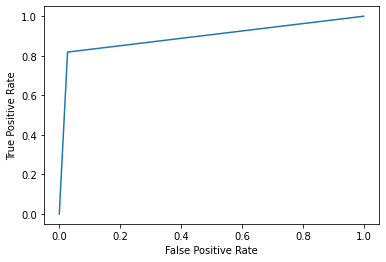

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Cross validating the model 

In [26]:
def cross_validation(model, _X, _y, _cv=5):

    _scoring = ['accuracy', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)
      
    return { "Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [27]:
score_dict = cross_validation(model, X, y, 10)
print("Mean Training Accuracy : ", score_dict.get("Mean Training Accuracy"))
print("Mean Validation Accuracy : ", score_dict.get("Mean Validation Accuracy"))
print("Mean Training F1 Score : ", score_dict.get("Mean Training F1 Score"))
print("Mean Validation F1 Score : ", score_dict.get("Mean Validation F1 Score"))

Mean Training Accuracy :  95.10095394268856
Mean Validation Accuracy :  94.19558659994438
Mean Training F1 Score :  0.8502532250684819
Mean Validation F1 Score :  0.824621114907236


### Hyper-parameter optimizing 

In [28]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf',"linear","poly"]} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=1)

In [29]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


### Developing the model using best parameter

In [30]:
# initializing the model with optimal parameter 
model_opt = SVC(C= 10, gamma = 1, kernel = 'rbf')

# training the model
model_opt.fit(X_train,y_train)

# predicting the model
y_pred_opt = model_opt.predict(X_test)

In [31]:
print("Test accuray score  :  ", metrics.accuracy_score(y_test,y_pred_opt))
print("Train accuray score :  ", model_opt.score(X_train,y_train))
print("F1 score            :  ", metrics.f1_score(y_test,y_pred_opt))

Test accuray score  :   0.96040016673614
Train accuray score :   0.9715387823185988
F1 score            :   0.8751642575558476


Text(0, 0.5, 'True Positive Rate')

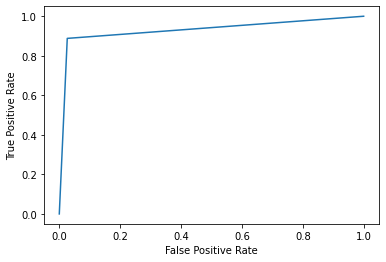

In [32]:
#ROC Curve  
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_opt)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

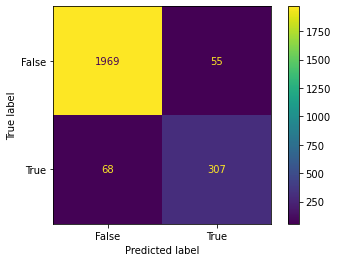

In [33]:
# printing confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Training the model with oversampling technique - Synthetic Minority Oversampling Technique

In [34]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X, y)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

print("shape of original dataframe : ", df_final.shape)
print("shape after oversampling    : ", oversampled.shape)

shape of original dataframe :  (11991, 18)
shape after oversampling    :  (20000, 18)


In [35]:
# spliting the data 
X_train1, X_test1, y_train1, y_test1 = train_test_split(oversampled_X, oversampled_Y, test_size = 0.2, random_state = 7)

In [36]:
# initializing the model with optimal parameter 
model_opt1 = SVC(C= 10, gamma = 1, kernel = 'rbf')

#training the model
model_opt1.fit(X_train1,y_train1)

#predicting the model
y_pred1 = model_opt1.predict(X_test1)

In [37]:
print("Test accuray score  :  ", metrics.accuracy_score(y_test1,y_pred1))
print("Train accuray score :  ", model_opt1.score(X_train1,y_train1))
print("F1 score            :  ", metrics.f1_score(y_test1,y_pred1))

Test accuray score  :   0.954
Train accuray score :   0.966125
F1 score            :   0.954228855721393


Text(0, 0.5, 'True Positive Rate')

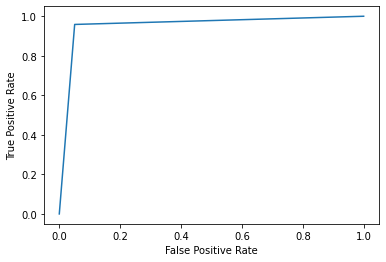

In [38]:
# roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

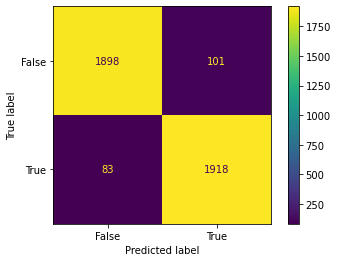

In [39]:
# printing confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test1, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()